In [31]:
import pandas as pd

directory = "./"
stores = pd.read_csv(directory + "store.csv")  
trains = pd.read_csv(directory + "train.csv")
tests = pd.read_csv(directory  + "test.csv")

stores

C:\Users\user\AppData\Local\Temp\ipykernel_20348\3014701360.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trains = pd.read_csv(directory + "train.csv")


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [32]:
trains

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01/01/2013,0,0,0,0,a,1
1017205,1112,2,01/01/2013,0,0,0,0,a,1
1017206,1113,2,01/01/2013,0,0,0,0,a,1
1017207,1114,2,01/01/2013,0,0,0,0,a,1


In [33]:
import pandas as pd

# Assuming the "Date" column is not already in datetime format
# Convert the "Date" column to datetime format
trains["Date"] = pd.to_datetime(trains["Date"], format="%d/%m/%Y", errors='coerce')

# Set the filtering conditions for all years
start_date = pd.to_datetime("08/01", format="%m/%d")
end_date = pd.to_datetime("09/17", format="%m/%d")

# Filter the data
new_trains = trains[(trains["Date"].dt.month == start_date.month) |  
                        ((trains["Date"].dt.month == end_date.month) & (trains["Date"].dt.day <= end_date.day))]

# Display the filtered data
new_trains

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
334555,1,3,2014-09-17,4383,490,1,1,0,0
334556,2,3,2014-09-17,6469,762,1,1,0,0
334557,3,3,2014-09-17,8034,795,1,1,0,0
334558,4,3,2014-09-17,8594,1173,1,1,0,0
334559,5,3,2014-09-17,5685,651,1,1,0,0
...,...,...,...,...,...,...,...,...,...
780825,1111,4,2013-08-01,5733,487,1,1,0,1
780826,1112,4,2013-08-01,12394,866,1,1,0,1
780827,1113,4,2013-08-01,8504,864,1,1,0,1
780828,1114,4,2013-08-01,24140,4022,1,1,0,0


In [34]:
import pandas as pd


# merge two DataFrame，use "Store" to connect
merged_df = pd.merge(new_trains, stores, on="Store", how="left")

# remove close stores
merged_df = merged_df[merged_df["Open"]==1]

merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,2014-09-17,4383,490,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,2014-09-17,6469,762,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,3,2014-09-17,8034,795,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,3,2014-09-17,8594,1173,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3,2014-09-17,5685,651,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98395,1111,4,2013-08-01,5733,487,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
98396,1112,4,2013-08-01,12394,866,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
98397,1113,4,2013-08-01,8504,864,1,1,0,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
98398,1114,4,2013-08-01,24140,4022,1,1,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [35]:
# merged_df.to_excel(directory+"merged_data.xlsx", index=False)

# Cleaning data

In [36]:
# Delete the column related to Promo2 
### because we can determine whether a promotion is happening from the 'Promo' column.
merged_df.drop(["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"], axis=1, inplace=True)

In [37]:
import pandas as pd
# Fill missing values with '2013-12-24'
merged_df['CompetitionOpenSinceYear'].fillna(2013, inplace=True)
merged_df['CompetitionOpenSinceMonth'].fillna(12, inplace=True)

# Convert 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' to integers
merged_df['CompetitionOpenSinceYear'] = merged_df['CompetitionOpenSinceYear'].astype(int)
merged_df['CompetitionOpenSinceMonth'] = merged_df['CompetitionOpenSinceMonth'].astype(int)

# Combine 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into a new column 'CompetitionOpenDate'
merged_df['CompetitionOpenDate'] = pd.to_datetime(merged_df['CompetitionOpenSinceYear'].astype(str) + 
                                                  '-' + 
                                                  merged_df['CompetitionOpenSinceMonth'].astype(str) + 
                                                  '-1', 
                                                  format='%Y-%m-%d')

# Delete the original 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' columns
merged_df.drop(['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'], axis=1, inplace=True)

# Create a new column 'hasCompetition' based on the comparison
merged_df['hasCompetition'] = 1  # Initially set to 1

# Compare 'CompetitionOpenDate' with 'Date' and update 'hasCompetition' accordingly
merged_df.loc[merged_df['CompetitionOpenDate'] > merged_df['Date'], 'hasCompetition'] = 0


# Find the maximum value in the 'CompetitionDistance' column
max_distance = merged_df['CompetitionDistance'].max()

# Fill missing values in the 'CompetitionDistance' column with the maximum value
merged_df['CompetitionDistance'].fillna(max_distance, inplace=True)

# Replace 'CompetitionDistance' values with the maximum value where 'hasCompetition' is 0
merged_df.loc[merged_df['hasCompetition'] == 0, 'CompetitionDistance'] = max_distance

- Add a 'hasCompetition' column to aid in determining whether a store had competitors during a specific period. => for linear model 

- Modify the 'CompetitionDistance' column, setting the competition distance to the maximum value for stores without competitors. => for tree model

In [38]:
# Set non-zero values in the 'StateHoliday' column to 1
merged_df["StateHoliday"] = merged_df["StateHoliday"].apply(lambda x: 1 if x != "0" else 0)

# Convert the column's data type to integer (int)
merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(int)

In [39]:
# Creating one-hot encoded DataFrame
encoded_df = pd.get_dummies(merged_df[['StoreType', 'Assortment']], drop_first=False)

# Concatenating the encoded DataFrame with the original DataFrame
merged_df= pd.concat([merged_df, encoded_df], axis=1)


In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'StoreType' and 'Assortment' columns
merged_df['StoreType'] = label_encoder.fit_transform(merged_df['StoreType'])
merged_df['Assortment'] = label_encoder.fit_transform(merged_df['Assortment'])

- hasCompetition,StoreType_a, StoreType_b, StoreType_c, StoreType_d, Assortment_a, Assortment_b, Assortment_c for linear model, such as linear regression, logistic regression

- CompetitionDistance, StoreType, Assortment for tree model, such as Decision Tree, Random Forest ,Gradient Boosting

# EDA

In [41]:
# check no missing data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84089 entries, 0 to 98399
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store                84089 non-null  int64         
 1   DayOfWeek            84089 non-null  int64         
 2   Date                 84089 non-null  datetime64[ns]
 3   Sales                84089 non-null  int64         
 4   Customers            84089 non-null  int64         
 5   Open                 84089 non-null  int64         
 6   Promo                84089 non-null  int64         
 7   StateHoliday         84089 non-null  int32         
 8   SchoolHoliday        84089 non-null  int64         
 9   StoreType            84089 non-null  int32         
 10  Assortment           84089 non-null  int32         
 11  CompetitionDistance  84089 non-null  float64       
 12  CompetitionOpenDate  84089 non-null  datetime64[ns]
 13  hasCompetition       84089 non-

In [42]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,hasCompetition,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
count,84089.000000,84089.000000,84089.000000,84089.000000,84089.0,84089.000000,84089.000000,84089.000000,84089.000000,84089.000000,84089.000000,84089.000000,84089.000000,84089.000000,84089.000000,84089.000000,84089.00000,84089.000000,84089.000000
mean,559.226427,3.518546,6664.188265,753.118184,1.0,0.433660,0.457040,0.454328,1.189288,0.949637,24279.841002,0.734365,0.545482,0.018837,0.136593,0.299088,0.52033,0.009704,0.469966
std,321.975621,1.742222,2923.732708,394.143151,0.0,0.495582,0.498154,0.497913,1.357431,0.993867,31859.534286,0.441673,0.497930,0.135951,0.343420,0.457861,0.49959,0.098030,0.499100
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,282.000000,2.000000,4675.000000,512.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,558.000000,4.000000,6124.000000,669.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,4820.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,839.000000,5.000000,8002.000000,881.000000,1.0,1.000000,1.000000,1.000000,3.000000,2.000000,75860.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000
max,1115.000000,7.000000,33913.000000,5145.000000,1.0,1.000000,1.000000,1.000000,3.000000,2.000000,75860.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


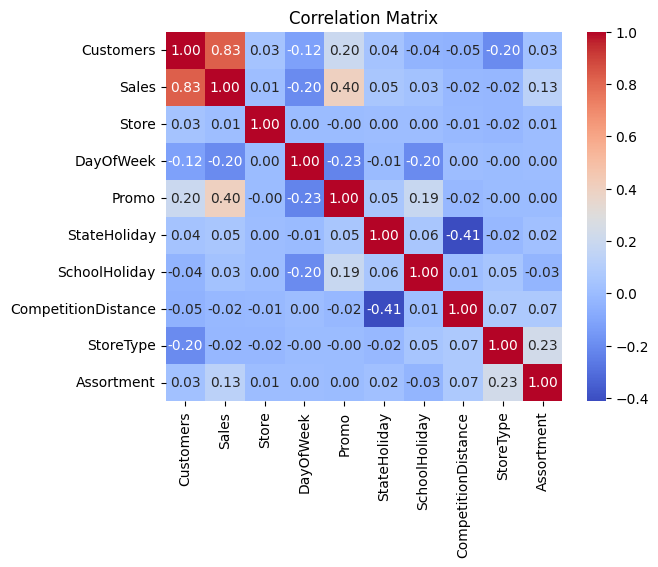

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for selected columns
correlation_matrix = merged_df[['Customers', 'Sales', 'Store', 'DayOfWeek', 'Promo', 'StateHoliday', 
                                'SchoolHoliday', 'CompetitionDistance', 
                                'StoreType', 'Assortment']].corr()

# Visualize the correlation matrix using a heatmap

# Create a heatmap using seaborn with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Set the title for the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


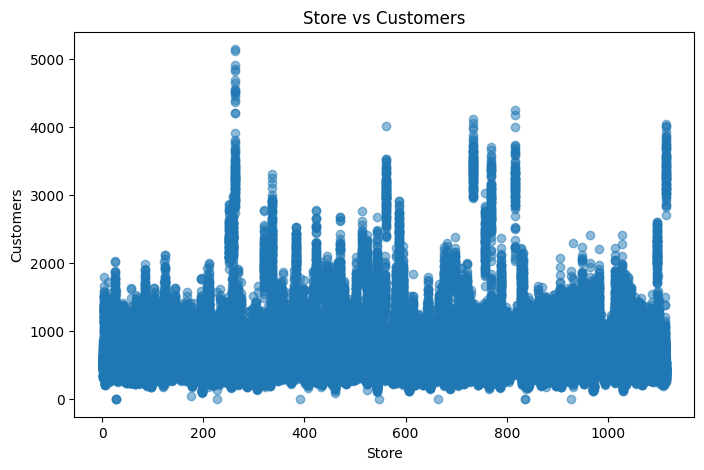

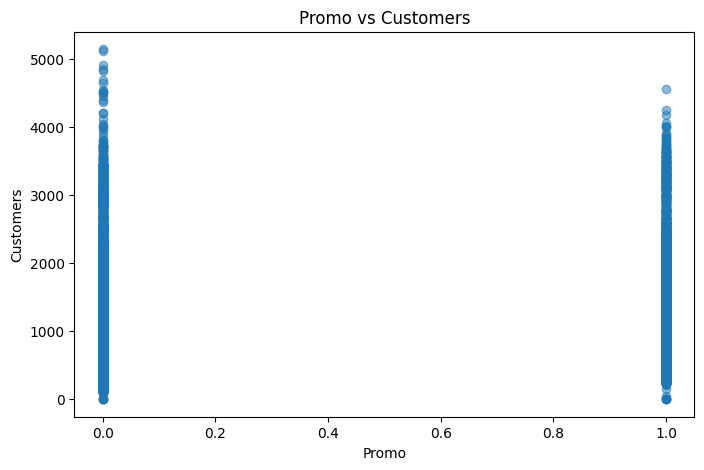

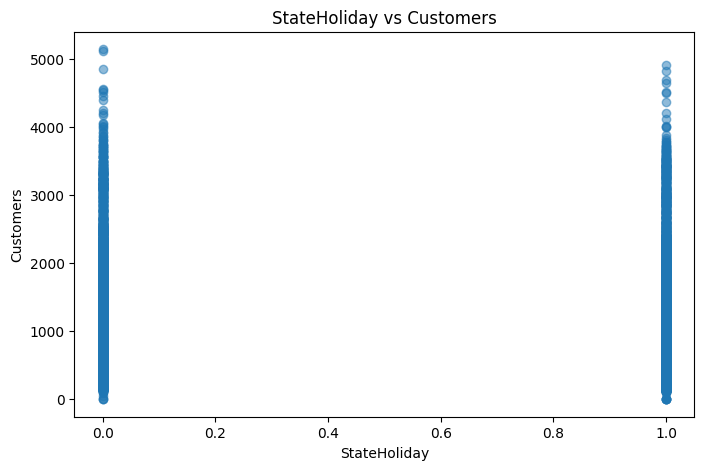

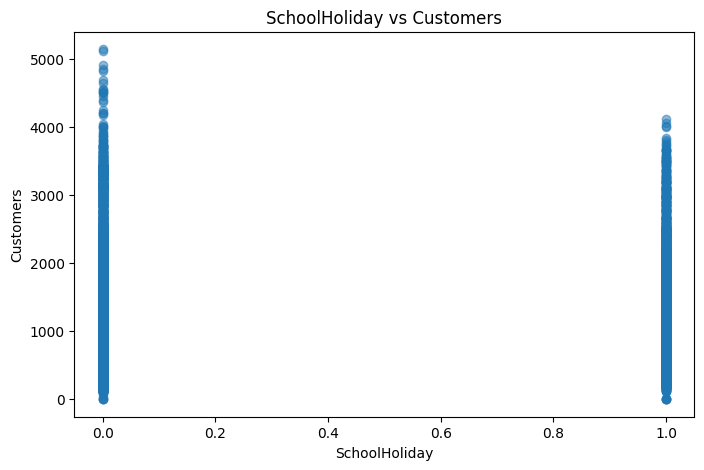

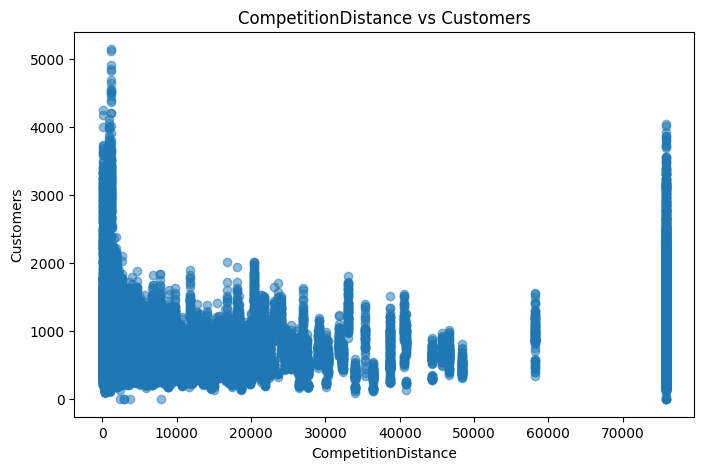

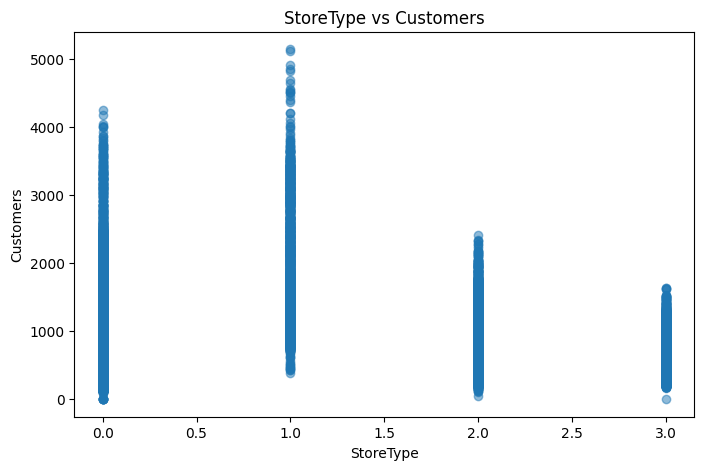

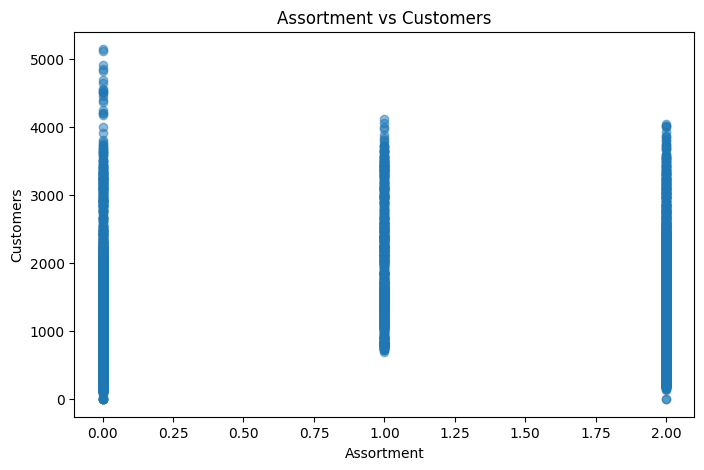

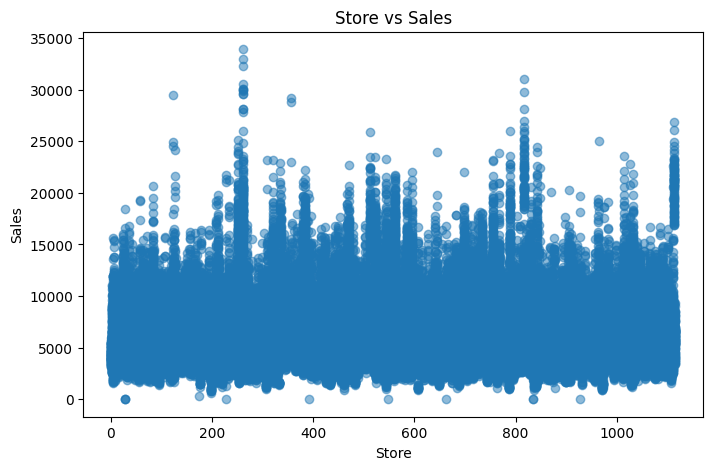

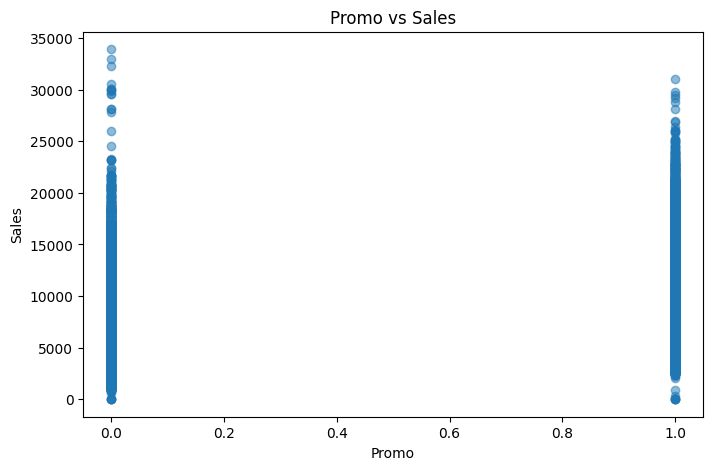

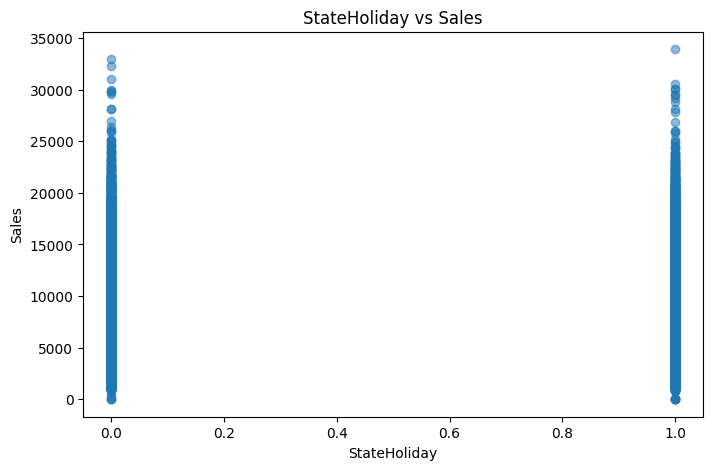

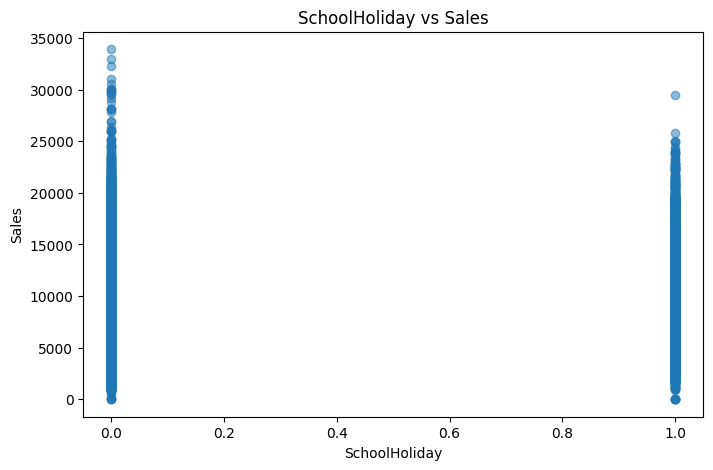

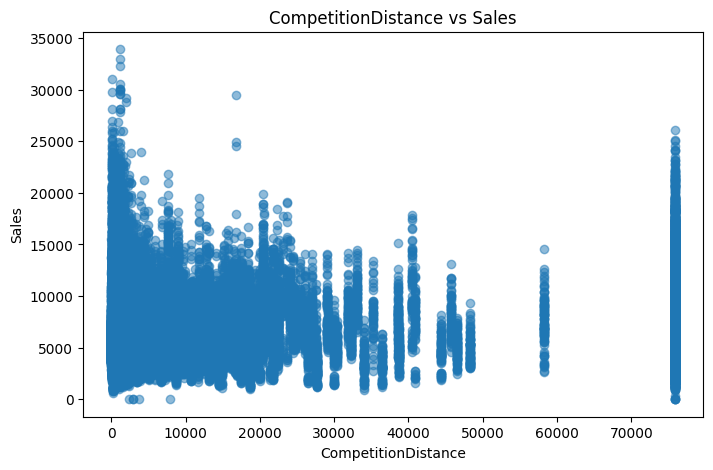

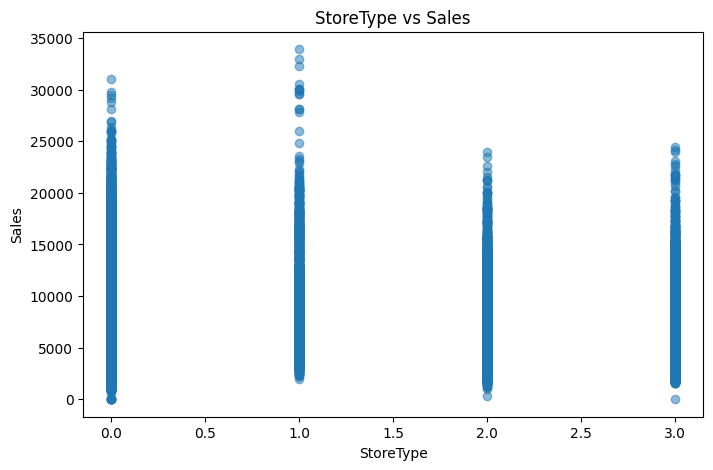

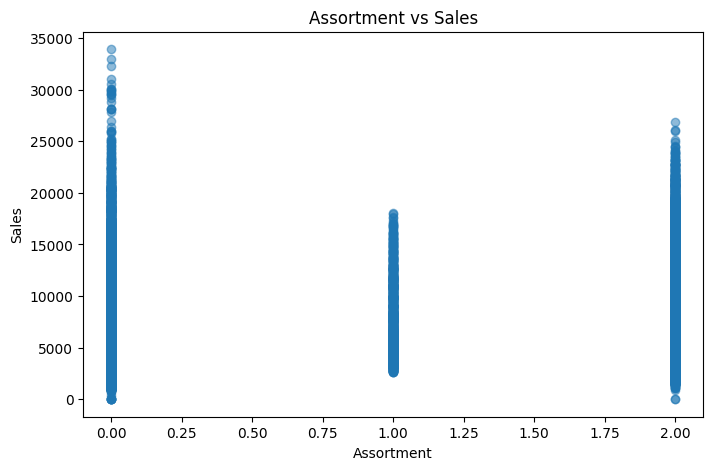

In [44]:
# Scatter plots of features vs. Customers and features vs. Sales

# List of features to visualize
features = ['Store', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'StoreType', 'Assortment']

# Iterate through each feature and create scatter plots
for feature in features:
    # Create a new figure with a specific size
    plt.figure(figsize=(8, 5))
    
    # Scatter plot of the feature against 'Customers'
    plt.scatter(merged_df[feature], merged_df['Customers'], alpha=0.5)
    
    # Set the title for the plot
    plt.title(f'{feature} vs Customers')
    
    # Label the x-axis and y-axis
    plt.xlabel(feature)
    plt.ylabel('Customers')
    
    # Display the scatter plot
    plt.show()

# Repeat the same process for 'Sales'
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(merged_df[feature], merged_df['Sales'], alpha=0.5)
    plt.title(f'{feature} vs Sales')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()


# Model training


In [45]:
# calculate_rmspe
import numpy as np

def calculate_rmspe(y_true, y_pred):
    epsilon = 1e-8
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / (y_true + epsilon)))) * 100
    return rmspe


### One hot encoding features

In [46]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variables (y1 for Customers, y2 for Sales)
X = merged_df[['hasCompetition', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d','Store',
               'Assortment_a', 'Assortment_b', 'Assortment_c', 'DayOfWeek',
               'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', "CompetitionDistance"]]
y1 = merged_df['Customers']
y2 = merged_df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

In [47]:
#linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Create two separate linear regression models
model_customers = LinearRegression()
model_sales = LinearRegression()

# Train the models on the training data
model_customers.fit(X_train, y1_train)
model_sales.fit(X_train, y2_train)

# Make predictions on the test data
y1_pred = model_customers.predict(X_test)
y2_pred = model_sales.predict(X_test)

# Calculate Root Mean Square Percentage Error (RMSPE) for both models
rmspe_customers = calculate_rmspe(y1_test, y1_pred)
rmspe_sales = calculate_rmspe(y2_test, y2_pred)

# Print the RMSPE for both models rounded to two decimal places
print("Linear regression")
print("RMSPE for Customers Model: {:.2f}".format(rmspe_customers))
print("RMSPE for Sales Model: {:.2f}".format(rmspe_sales))


Linear regression
RMSPE for Customers Model: 51.37
RMSPE for Sales Model: 50.19


In [48]:
# RandomForestRegressor
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Create two separate Random Forest models
model_customers = RandomForestRegressor(random_state=42)
model_sales = RandomForestRegressor(random_state=42)

# Train the models on the training data
model_customers.fit(X_train, y1_train)
model_sales.fit(X_train, y2_train)

# Make predictions on the test data
y1_pred = model_customers.predict(X_test)
y2_pred = model_sales.predict(X_test)

# Calculate Root Mean Square Percentage Error (RMSPE) for both models
rmspe_customers = calculate_rmspe(y1_test, y1_pred)
rmspe_sales = calculate_rmspe(y2_test, y2_pred)

# Print the RMSPE for both models rounded to two decimal places
print("Random Forest Regressor")
print("RMSPE for Customers Model: {:.2f}".format(rmspe_customers))
print("RMSPE for Sales Model: {:.2f}".format(rmspe_sales))

Random Forest Regressor
RMSPE for Customers Model: 17.47
RMSPE for Sales Model: 23.91


In [49]:
# DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create two separate Decision Tree models
model_customers = DecisionTreeRegressor(random_state=42)
model_sales = DecisionTreeRegressor(random_state=42)

# Train the models on the training data
model_customers.fit(X_train, y1_train)
model_sales.fit(X_train, y2_train)

# Make predictions on the test data
y1_pred = model_customers.predict(X_test)
y2_pred = model_sales.predict(X_test)

# Calculate Root Mean Square Percentage Error (RMSPE) for both models
rmspe_customers = calculate_rmspe(y1_test, y1_pred)
rmspe_sales = calculate_rmspe(y2_test, y2_pred)

# Print the RMSPE for both models rounded to two decimal places
print("Decision Tree Regressor")
print("RMSPE for Customers Model: {:.2f}".format(rmspe_customers))
print("RMSPE for Sales Model: {:.2f}".format(rmspe_sales))

Decision Tree Regressor
RMSPE for Customers Model: 19.11
RMSPE for Sales Model: 24.61


In [50]:
# GradientBoostingRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor


# Create two separate Gradient Boosting models
model_customers = GradientBoostingRegressor(random_state=42)
model_sales = GradientBoostingRegressor(random_state=42)

# Train the models on the training data
model_customers.fit(X_train, y1_train)
model_sales.fit(X_train, y2_train)

# Make predictions on the test data
y1_pred = model_customers.predict(X_test)
y2_pred = model_sales.predict(X_test)

# Calculate Root Mean Square Percentage Error (RMSPE) for both models
rmspe_customers = calculate_rmspe(y1_test, y1_pred)
rmspe_sales = calculate_rmspe(y2_test, y2_pred)

# Print the RMSPE for both models rounded to two decimal places
print("GradientBoostingRegressor")
print("RMSPE for Customers Model: {:.2f}".format(rmspe_customers))
print("RMSPE for Sales Model: {:.2f}".format(rmspe_sales))

GradientBoostingRegressor
RMSPE for Customers Model: 45.58
RMSPE for Sales Model: 47.58


### Label encoding features

In [51]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variables (y1 for Customers, y2 for Sales)
X = merged_df[['hasCompetition', 'StoreType', 'Assortment', 'Store', 'DayOfWeek',
               'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', "CompetitionDistance"]]
y1 = merged_df['Customers']
y2 = merged_df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

In [52]:
# RandomForestRegressor

import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Create two separate Random Forest models
model_customers = RandomForestRegressor(random_state=42)
model_sales = RandomForestRegressor(random_state=42)

# Train the models on the training data
model_customers.fit(X_train, y1_train)
model_sales.fit(X_train, y2_train)

# Make predictions on the test data
y1_pred = model_customers.predict(X_test)
y2_pred = model_sales.predict(X_test)

# Calculate Root Mean Square Percentage Error (RMSPE) for both models
rmspe_customers = calculate_rmspe(y1_test, y1_pred)
rmspe_sales = calculate_rmspe(y2_test, y2_pred)

# Print the RMSPE for both models rounded to two decimal places
print("Random Forest Regressor")
print("RMSPE for Customers Model: {:.2f}".format(rmspe_customers))
print("RMSPE for Sales Model: {:.2f}".format(rmspe_sales))

Random Forest Regressor
RMSPE for Customers Model: 17.43
RMSPE for Sales Model: 24.14


In [53]:
# DecisionTreeRegressor

import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create two separate Decision Tree models
model_customers = DecisionTreeRegressor(random_state=42)
model_sales = DecisionTreeRegressor(random_state=42)

# Train the models on the training data
model_customers.fit(X_train, y1_train)
model_sales.fit(X_train, y2_train)

# Make predictions on the test data
y1_pred = model_customers.predict(X_test)
y2_pred = model_sales.predict(X_test)

# Calculate Root Mean Square Percentage Error (RMSPE) for both models
rmspe_customers = calculate_rmspe(y1_test, y1_pred)
rmspe_sales = calculate_rmspe(y2_test, y2_pred)

# Print the RMSPE for both models rounded to two decimal places
print("Decision Tree Regressor")
print("RMSPE for Customers Model: {:.2f}".format(rmspe_customers))
print("RMSPE for Sales Model: {:.2f}".format(rmspe_sales))

Decision Tree Regressor
RMSPE for Customers Model: 18.25
RMSPE for Sales Model: 24.51


### test datasets pre-processing

In [54]:
import pandas as pd

# Merge two DataFrames, using "Store" as the key to connect them
merged_df1 = pd.merge(tests, stores, on="Store", how="left")

# Remove columns related to Promo2 
# We can determine whether a promotion is happening from the 'Promo' column.
merged_df1.drop(["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"], axis=1, inplace=True)

import pandas as pd
# Fill missing values in 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' with '2013-12-24'
merged_df1['CompetitionOpenSinceYear'].fillna(2013, inplace=True)
merged_df1['CompetitionOpenSinceMonth'].fillna(12, inplace=True)

# Convert 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' to integers
merged_df1['CompetitionOpenSinceYear'] = merged_df1['CompetitionOpenSinceYear'].astype(int)
merged_df1['CompetitionOpenSinceMonth'] = merged_df1['CompetitionOpenSinceMonth'].astype(int)

# Combine 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into a new column 'CompetitionOpenDate'
merged_df1['CompetitionOpenDate'] = pd.to_datetime(merged_df1['CompetitionOpenSinceYear'].astype(str) + 
                                                  '-' + 
                                                  merged_df1['CompetitionOpenSinceMonth'].astype(str) + 
                                                  '-1', 
                                                  format='%Y-%m-%d')

# Delete the original 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' columns
merged_df1.drop(['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'], axis=1, inplace=True)

# Create a new column 'hasCompetition' based on the comparison
merged_df1['hasCompetition'] = 1  # Initially set to 1

# Compare 'CompetitionOpenDate' with 'Date' and update 'hasCompetition' accordingly
merged_df1.loc[merged_df1['CompetitionOpenDate'] > merged_df1['Date'], 'hasCompetition'] = 0

# Find the maximum value in the 'CompetitionDistance' column
max_distance = merged_df1['CompetitionDistance'].max()

# Fill missing values in the 'CompetitionDistance' column with the maximum value
merged_df1['CompetitionDistance'].fillna(max_distance, inplace=True)

# Replace 'CompetitionDistance' values with the maximum value where 'hasCompetition' is 0
merged_df1.loc[merged_df1['hasCompetition'] == 0, 'CompetitionDistance'] = max_distance

# Set non-zero values in the 'StateHoliday' column to 1
merged_df1["StateHoliday"] = merged_df1["StateHoliday"].apply(lambda x: 1 if x != "0" else 0)

# Convert the column's data type to integer (int)
merged_df1["StateHoliday"] = merged_df1["StateHoliday"].astype(int)

# Create one-hot encoded DataFrame
encoded_df = pd.get_dummies(merged_df1[['StoreType', 'Assortment']], drop_first=False)

# Concatenate the encoded DataFrame with the original DataFrame
merged_df1 = pd.concat([merged_df1, encoded_df], axis=1)

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'StoreType' and 'Assortment' columns
merged_df1['StoreType'] = label_encoder.fit_transform(merged_df1['StoreType'])
merged_df1['Assortment'] = label_encoder.fit_transform(merged_df1['Assortment'])


C:\Users\user\AppData\Local\Temp\ipykernel_20348\3504885884.py:33: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df1.loc[merged_df1['CompetitionOpenDate'] > merged_df1['Date'], 'hasCompetition'] = 0


In [55]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store                41088 non-null  int64         
 1   DayOfWeek            41088 non-null  int64         
 2   Date                 41088 non-null  object        
 3   Sales                0 non-null      float64       
 4   Customers            0 non-null      float64       
 5   Open                 41077 non-null  float64       
 6   Promo                41088 non-null  int64         
 7   StateHoliday         41088 non-null  int32         
 8   SchoolHoliday        41088 non-null  int64         
 9   StoreType            41088 non-null  int32         
 10  Assortment           41088 non-null  int32         
 11  CompetitionDistance  41088 non-null  float64       
 12  CompetitionOpenDate  41088 non-null  datetime64[ns]
 13  hasCompetition       41088 non-

In [56]:
merged_df1["Open"].fillna(1, inplace=True)

In [57]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store                41088 non-null  int64         
 1   DayOfWeek            41088 non-null  int64         
 2   Date                 41088 non-null  object        
 3   Sales                0 non-null      float64       
 4   Customers            0 non-null      float64       
 5   Open                 41088 non-null  float64       
 6   Promo                41088 non-null  int64         
 7   StateHoliday         41088 non-null  int32         
 8   SchoolHoliday        41088 non-null  int64         
 9   StoreType            41088 non-null  int32         
 10  Assortment           41088 non-null  int32         
 11  CompetitionDistance  41088 non-null  float64       
 12  CompetitionOpenDate  41088 non-null  datetime64[ns]
 13  hasCompetition       41088 non-

# Predict

In [58]:
# Define the features (X) and target variables (y1 for Customers, y2 for Sales)
X_train = merged_df[['hasCompetition', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
               'Assortment_a', 'Assortment_b', 'Assortment_c', 'Store', 'DayOfWeek',
               'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', "CompetitionDistance"]]
y1_train = merged_df['Customers']
y2_train = merged_df['Sales']


X_test = merged_df1[['hasCompetition', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
               'Assortment_a', 'Assortment_b', 'Assortment_c', 'Store', 'DayOfWeek',
               'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', "CompetitionDistance"]]


In [59]:
# RandomForestRegressor
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Create two separate Random Forest models
model_customers = RandomForestRegressor(random_state=42)
model_sales = RandomForestRegressor(random_state=42)

# Train the models on the training data
model_customers.fit(X_train, y1_train)
model_sales.fit(X_train, y2_train)

# Make predictions on the test data
tests['Customers'] = np.round(model_customers.predict(X_test))
tests['Sales']     = np.round(model_sales.predict(X_test))



In [60]:
## If stores close, then Sales and Customers are 0

# Check if the "Open" column in the 'tests' DataFrame has a value of 0
closed_rows = tests[tests["Open"] == 0]

# For the rows where "Open" is 0, set the corresponding values in the "Sales" and "Customers" columns to 0
tests.loc[closed_rows.index, ["Sales", "Customers"]] = 0

tests[tests["Open"] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
543,703,4,17/09/2015,0.0,0.0,0.0,1,0,0
676,879,4,17/09/2015,0.0,0.0,0.0,1,0,0
840,1097,4,17/09/2015,0.0,0.0,0.0,1,0,0
1399,703,3,16/09/2015,0.0,0.0,0.0,1,0,0
1532,879,3,16/09/2015,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...
40227,1111,7,02/08/2015,0.0,0.0,0.0,0,0,0
40228,1112,7,02/08/2015,0.0,0.0,0.0,0,0,0
40229,1113,7,02/08/2015,0.0,0.0,0.0,0,0,0
40230,1114,7,02/08/2015,0.0,0.0,0.0,0,0,0


In [61]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          41088 non-null  float64
 4   Customers      41088 non-null  float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [62]:
tests

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,4916.0,554.0,1.0,1,0,0
1,3,4,17/09/2015,8641.0,857.0,1.0,1,0,0
2,7,4,17/09/2015,9480.0,1035.0,1.0,1,0,0
3,8,4,17/09/2015,6471.0,804.0,1.0,1,0,0
4,9,4,17/09/2015,6108.0,550.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,2772.0,237.0,1.0,0,0,0
41084,1112,6,01/08/2015,8514.0,725.0,1.0,0,0,0
41085,1113,6,01/08/2015,5616.0,584.0,1.0,0,0,0
41086,1114,6,01/08/2015,21346.0,3677.0,1.0,0,0,0


In [63]:
tests.to_csv('test.csv')